<center>
<h1>Midterm - NLM</h1>
<h3> Do Manh Hung - 20002053</h3>
</center>

# Import library

In [1]:
import numpy as np
import matplotlib.pylab as plt

from underthesea import word_tokenize
from stop_words import get_stop_words
from gensim.models import Word2Vec
from string import punctuation


import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Bidirectional, LSTM
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import re
import pickle

# 1. Tiền xử lý dữ liệu 

In [2]:
data_dulich = []
data_giaitri = []
data_giaoduc = []
data_khoahoc = []
data_kinhdoanh = []
data_phapluat = []
data_suckhoe = []
data_thethao = []

with open('./raw_vnexpress_titles/raw_data/DU_LICH.txt') as dulich:
    for i in dulich:
        if (i == '\n'):
            continue
        data_dulich.append(i.strip())

with open('./raw_vnexpress_titles/raw_data/GIAI_TRI.txt') as giaitri:
    for i in giaitri:
        if (i == '\n'):
            continue
        data_giaitri.append(i.strip())
    
with open('./raw_vnexpress_titles/raw_data/GIAO_DUC.txt') as giaoduc:
    for i in giaoduc:
        if (i == '\n'):
            continue
        data_giaoduc.append(i.strip())
    
with open('./raw_vnexpress_titles/raw_data/KHOA_HOC.txt') as khoahoc:
    for i in khoahoc:
        if (i == '\n'):
            continue
        data_khoahoc.append(i.strip())
    
with open('./raw_vnexpress_titles/raw_data/KINH_DOANH.txt') as kinhdoanh:
    for i in kinhdoanh:
        if (i == '\n'):
            continue
        data_kinhdoanh.append(i.strip())
    
with open('./raw_vnexpress_titles/raw_data/PHAP_LUAT.txt') as phapluat:
    for i in phapluat:
        if (i == '\n'):
            continue
        data_phapluat.append(i.strip())
    
with open('./raw_vnexpress_titles/raw_data/SUC_KHOE.txt') as suckhoe:
    for i in suckhoe:
        if (i == '\n'):
            continue
        data_suckhoe.append(i.strip())
with open('./raw_vnexpress_titles/raw_data/THE_THAO.txt') as thethao:
    for i in thethao:
        if (i == '\n'):
            continue
        data_thethao.append(i.strip())
        
label_dulich = list(np.ones(len(data_dulich), dtype=int) * 0)
label_giaitri = list(np.ones(len(data_giaitri), dtype=int) * 1)
label_giaoduc = list(np.ones(len(data_giaoduc), dtype=int) * 2)
label_khoahoc = list(np.ones(len(data_khoahoc), dtype=int) * 3)
label_kinhdoanh = list(np.ones(len(data_kinhdoanh), dtype=int) * 4)
label_phapluat = list(np.ones(len(data_phapluat), dtype=int) * 5)
label_suckhoe = list(np.ones(len(data_suckhoe), dtype=int) * 6)
label_thethao = list(np.ones(len(data_thethao), dtype=int) * 7)

In [3]:
len(data_dulich), len(data_giaitri), len(data_giaoduc), len(data_khoahoc), len(data_kinhdoanh), len(data_phapluat), len(data_suckhoe), len(data_thethao)

(625, 623, 613, 605, 624, 634, 619, 624)

In [4]:
len(label_dulich), len(label_giaitri), len(label_giaoduc), len(label_khoahoc), len(label_kinhdoanh), len(label_phapluat), len(label_suckhoe), len(label_thethao)

(625, 623, 613, 605, 624, 634, 619, 624)

In [5]:
data = data_dulich + data_giaitri + data_giaoduc + data_khoahoc + data_kinhdoanh + data_phapluat + data_suckhoe + data_thethao
label = label_dulich + label_giaitri + label_giaoduc + label_khoahoc + label_kinhdoanh + label_phapluat + label_suckhoe + label_thethao

In [6]:
len(data), len(label)

(4967, 4967)

In [7]:
data

["Khách Việt sẵn sàng chi tiền cho 'du lịch xanh'",
 'Nhà tù Hoả Lò - điểm đến lịch sử hút giới trẻ kỳ nghỉ lễ',
 'Nơi có những ngôi nhà nằm dưới đá',
 'Nhiều người lên núi Bà Đen hàng năm để cầu may',
 'Từ 15/5, tất cả du khách vào phố cổ Hội An phải mua vé',
 '5 nơi có Tết té nước đông vui nhất Thái Lan',
 'Trong lễ Tình nhân người nước nào tặng nhau thìa?',
 'Phụ nữ mặc áo dài được miễn phí tham quan di tích',
 'Đảo Dấu - điểm đến nhiều trải nghiệm',
 '7 ngày ăn và lặn ở vùng biển tây Thái Lan',
 'Phiên chợ ném nhau cầu may diễn ra ở đâu?',
 "Đà Lạt và Sa Pa như 'dãy Alps của châu Á'",
 'Vợ chồng U70 hai tháng đi khắp Việt Nam bằng xe máy',
 "Khách thích 'du lịch xanh' nhưng ngại trả thêm tiền",
 'Công viên đá hoang sơ ở Ninh Thuận',
 'Người dân Huế vui vì VnExpress Marathon hút du khách',
 'Cây vả lộn ngược - điểm đến hút khách ở Naples',
 "Du khách đi chùa ngày xuân: 'Biết đông nhưng vẫn cố'",
 'Lễ hội văn hóa ẩm thực trên 350 món ngon ba miền ở TP HCM',
 'Xếp hàng ăn bánh trôi vỉ

In [8]:
def processing_Vi(text):
    # chuyển về chữ thường
    text = text.lower()
    # Loại bỏ số
    text = re.sub(r'\d+', 'num', text)
    # Loại bỏ các ký tự không cần thiết
    text = re.sub(f'[{punctuation}]', ' ', text)
    # Loại bỏ các khoảng trắng dư thừa (nhiều hơn 2)
    text = re.sub(r'\s{2,}', ' ', text)
    return text

def tokenize_Vi(text):
    # Tokenization
    tokens = word_tokenize(text)
    return tokens
    
def remove_stopword_Vi(words_token):
    # Loại bỏ stopwords
    # Tải danh sách stopwords tiếng Việt
    stop_words = get_stop_words('vi')
    # Loại bỏ stopwords
    filtered_tokens = [word for word in words_token if word not in stop_words]
    return filtered_tokens


In [9]:
filted_words = []
for doc in data:
    filted_words.append(remove_stopword_Vi(tokenize_Vi(processing_Vi(doc))))

data_processed= []
for doc in filted_words:
    temp = []
    for word in doc:
        if word == 'num':
            word = '<num>'
        temp.append(word)
    data_processed.append(temp)

In [10]:
data_processed

[['việt', 'sẵn sàng', 'chi', 'tiền', 'du lịch', 'xanh'],
 ['nhà tù',
  'hỏa',
  'lò điểm',
  'lịch sử',
  'hút giới',
  'trẻ',
  'kỳ',
  'nghỉ',
  'lễ'],
 ['nằm', 'đá'],
 ['núi', 'đen', 'hàng', 'cầu', 'may'],
 ['<num>', '<num>', 'du khách', 'phố', 'cổ', 'hội an', 'mua', 'vé'],
 ['<num>', 'tết', 'té', 'đông vui', 'nhất thái lan'],
 ['lễ', 'tình nhân', 'tặng', 'thìa'],
 ['phụ nữ', 'mặc', 'áo dài', 'miễn phí', 'tham quan', 'di tích'],
 ['đảo', 'dấu điểm', 'trải nghiệm'],
 ['<num>', 'lặn', 'vùng biển', 'tây thái', 'lan'],
 ['phiên', 'chợ', 'ném', 'cầu may', 'diễn'],
 ['đà', 'lạt', 'sa pa', 'dãy', 'alps', 'châu á'],
 ['vợ chồng', 'unum', 'hai', 'đi', 'khắp', 'việt nam', 'xe máy'],
 ['du lịch', 'xanh', 'ngại', 'tiền'],
 ['công viên', 'đá', 'hoang sơ', 'ninh thuận'],
 ['người dân', 'huế', 'vui', 'vnexpress', 'marathon hút', 'du khách'],
 ['cây vả lộn', 'ngược điểm', 'hút', 'naples'],
 ['du khách', 'đi', 'chùa', 'xuân', 'đông', 'cố'],
 ['lễ hội', 'văn hóa', 'ẩm thực', '<num>', 'món', 'ngon', '

In [11]:
len(data_dulich), len(data_giaitri), len(data_giaoduc), len(data_khoahoc), len(data_kinhdoanh), len(data_phapluat), len(data_suckhoe), len(data_thethao)

(625, 623, 613, 605, 624, 634, 619, 624)

In [12]:
data_dulich_processed = data_processed[:625]
data_giaitri_processed = data_processed[625:625+623]
data_giaoduc_processed = data_processed[625+623:625+623+613]
data_khoahoc_processed = data_processed[625+623+613:625+623+613+605]
data_kinhdoanh_processed = data_processed[625+623+613+605:625+623+613+605+624]
data_phapluat_processed = data_processed[625+623+613+605+624:625+623+613+605+624+634]
data_suckhoe_processed = data_processed[625+623+613+605+624+634:625+623+613+605+624+634+619]
data_thethao_processed = data_processed[625+623+613+605+624+634+619:]

In [13]:
len(data_dulich_processed), len(data_giaitri_processed), len(data_giaoduc_processed), len(data_khoahoc_processed), len(data_kinhdoanh_processed), len(data_phapluat_processed), len(data_suckhoe_processed), len(data_thethao_processed)

(625, 623, 613, 605, 624, 634, 619, 624)

In [14]:
# Chia dữ liệu thành 2 tập, tập train và tập test
X_train_dulich, X_test_dulich, y_train_dulich, y_test_dulich = train_test_split(data_dulich_processed, label_dulich, test_size=0.2, random_state=0)
X_train_giaitri, X_test_giaitri, y_train_giaitri, y_test_giaitri = train_test_split(data_giaitri_processed, label_giaitri, test_size=0.2, random_state=0)
X_train_giaoduc, X_test_giaoduc, y_train_giaoduc, y_test_giaoduc = train_test_split(data_giaoduc_processed, label_giaoduc, test_size=0.2, random_state=0)
X_train_khoahoc, X_test_khoahoc, y_train_khoahoc, y_test_khoahoc = train_test_split(data_khoahoc_processed, label_khoahoc, test_size=0.2, random_state=0)
X_train_kinhdoanh, X_test_kinhdoanh, y_train_kinhdoanh, y_test_kinhdoanh = train_test_split(data_kinhdoanh_processed, label_kinhdoanh, test_size=0.2, random_state=0)
X_train_phapluat, X_test_phapluat, y_train_phapluat, y_test_phapluat = train_test_split(data_phapluat_processed, label_phapluat, test_size=0.2, random_state=0)
X_train_suckhoe, X_test_suckhoe, y_train_suckhoe, y_test_suckhoe = train_test_split(data_suckhoe_processed, label_suckhoe, test_size=0.2, random_state=0)
X_train_thethao, X_test_thethao, y_train_thethao, y_test_thethao = train_test_split(data_thethao_processed, label_thethao, test_size=0.2, random_state=0)

In [15]:
data = data_dulich + data_giaitri + data_giaoduc + data_khoahoc + data_kinhdoanh + data_phapluat + data_suckhoe + data_thethao
label = label_dulich + label_giaitri + label_giaoduc + label_khoahoc + label_kinhdoanh + label_phapluat + label_suckhoe + label_thethao

In [16]:
data_train = X_train_dulich + X_train_giaitri + X_train_giaoduc + X_train_khoahoc + X_train_kinhdoanh + X_train_phapluat + X_train_suckhoe + X_train_thethao
data_test = X_test_dulich + X_test_giaitri + X_test_giaoduc + X_test_khoahoc + X_test_kinhdoanh + X_test_phapluat + X_test_suckhoe + X_test_thethao

y_train = y_train_dulich + y_train_giaitri + y_train_giaoduc + y_train_khoahoc + y_train_kinhdoanh + y_train_phapluat + y_train_suckhoe + y_train_thethao
y_test = y_test_dulich + y_test_giaitri + y_test_giaoduc + y_test_khoahoc + y_test_kinhdoanh + y_test_phapluat + y_test_suckhoe + y_test_thethao


In [17]:
len(data_train), len(y_train), len(data_test), len(y_test)

(3972, 3972, 995, 995)

# 2. Build Model

### TF-IDF

In [18]:
# Tạo một đối tượng TfidfVectorizer
tfidf = TfidfVectorizer()
marge_data = data_train + data_test
# Kết hợp danh sách các từ thành các chuỗi cho mỗi văn bản
marge_data_as_strings = [' '.join(document) for document in marge_data] 
# test_as_strings = [' '.join(document) for document in data_test]

# Biến đổi dữ liệu văn bản thành ma trận TF-IDF
tfidf_matrix_marge_data = tfidf.fit_transform(marge_data_as_strings)
tfidf_matrix_marge_data = tfidf_matrix_marge_data.toarray()

In [19]:
X_train = tfidf_matrix_marge_data[:len(data_train), :]
X_test = tfidf_matrix_marge_data[len(data_train):, :]

y_train = to_categorical(np.array(y_train).reshape(-1, 1))
y_test = to_categorical(np.array(y_test).reshape(-1, 1))

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3972, 3601), (3972, 8), (995, 3601), (995, 8))

In [21]:
model = Sequential([
    # Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(8, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
125/125 [==============================] - 2s 3ms/step - loss: 2.1622 - accuracy: 0.5556
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 1.9296 - accuracy: 0.7188
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 1.8236 - accuracy: 0.7792
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 1.7299 - accuracy: 0.7852
Epoch 5/50
125/125 [==============================] - 0s 4ms/step - loss: 1.6485 - accuracy: 0.8074
Epoch 6/50
125/125 [==============================] - 0s 4ms/step - loss: 1.5771 - accuracy: 0.8202
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 1.5167 - accuracy: 0.8336
Epoch 8/50
125/125 [==============================] - 0s 3ms/step - loss: 1.4638 - accuracy: 0.8371
Epoch 9/50
125/125 [==============================] - 0s 3ms/step - loss: 1.4163 - accuracy: 0.8499
Epoch 10/50
125/125 [==============================] - 0s 3ms/step - loss: 1.3713 - accuracy: 0.8547

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                230528    
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
Total params: 231,048
Trainable params: 231,048
Non-trainable params: 0
_________________________________________________________________


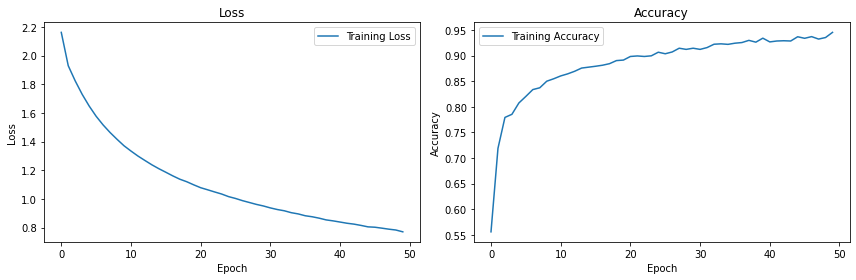

In [23]:
train_loss = history.history['loss']
# val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']

# Vẽ đồ thị loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Vẽ đồ thị accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
# plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 3. Đánh giá mô hình

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Độ chính xác trên tập test: {accuracy * 100:.2f}%")

32/32 [==============================] - 0s 3ms/step - loss: 1.0237 - accuracy: 0.8241
Độ chính xác trên tập test: 82.41%


# 4. Chạy thử mô hình

In [25]:
categorical = {0: 'du lich', 1:'giai tri', 2: 'giao duc', 3: 'khoa hoc', 4:'kinh doanh', 5: 'phap luat', 6: 'suc khoe', 7: 'the thao'}

In [26]:
text = input('input text: ')
print(text)
filted_text = remove_stopword_Vi(tokenize_Vi(processing_Vi(text)))

text_processed= []
for word in filted_text:
    if word == 'num':
        word = '<num>'
    text_processed.append(word)
  
text_as_strings = [' '.join(text_processed)]
tfidf_matrix_text = tfidf.transform(text_as_strings)
tfidf_matrix_text = tfidf_matrix_text.toarray()
pred = model.predict(tfidf_matrix_text)
categorical[np.argmax(pred)]


Nhà khoa học trẻ có cơ hội nhận 25.000 USD giải thưởng của APEC
1/1 [==============================] - 0s 52ms/step


'khoa hoc'

# 5. Version python and library
* python=3.9.16
* library: 

import numpy as np

import matplotlib.pylab as plt

from underthesea import word_tokenize

from stop_words import get_stop_words

from string import punctuation

import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential

from keras.layers import Dense

from sklearn.feature_extraction.text import TfidfVectorizer

from keras.utils import to_categorical

from sklearn.model_selection import train_test_split